## Import Libraries

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Preprocess Data

In [25]:
# define a function to retrieve a subset 

def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)
    
    indices = np.concatenate([indices_0, indices_1, indices_2], axis = 0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace = False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [26]:
# load cifar10 data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3) (3000, 32, 32, 3) (3000, 3)


## Visualize Examples

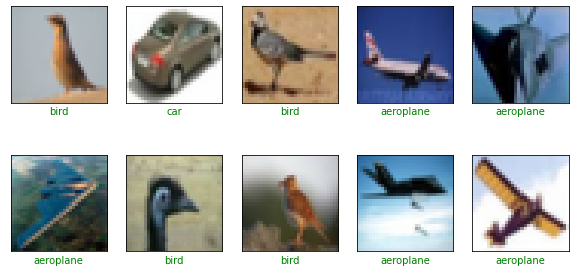

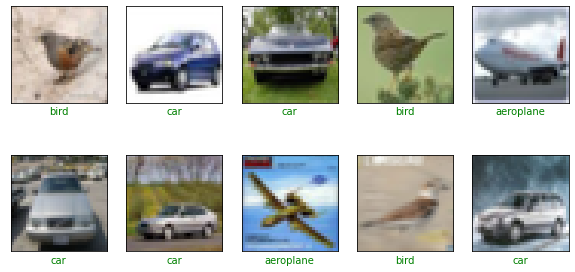

In [27]:
# check the data and label

class_names = ["aeroplane", "car", "bird"]

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize = (10, 5))
    
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        
        col = "green" if np.argmax(y[i]) == np.argmax(p[i]) else "red"
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
        
    plt.show()
    
show_random_examples(x_train, y_train, y_train)
show_random_examples(x_test, y_test, y_test)

## Create Model

In [28]:
# import layers

from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [29]:
# create model

def add_conv_block(model, num_filters):
    model.add(Conv2D(num_filters, 3, activation = "relu", padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters, 3, activation = "relu"))
    model.add(MaxPooling2D(pool_size = 2))
    model.add(Dropout(0.5))
    return model

def create_model():
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (32, 32, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)

    model.add(Flatten())
    model.add(Dense(3, activation = "softmax"))
    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 64)       

## Train the Model

In [30]:
# train and save the best fit model

history = model.fit(
    x_train/255., y_train,
    validation_data = (x_test/255., y_test),
    epochs = 10, batch_size = 128,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 3),
        tf.keras.callbacks.ModelCheckpoint(
            "models/model_{val_accuracy: .3f}.h5",
            save_best_only = True,
            save_weights_only = False,
            monitor = "val_accuracy"      
        )          
    ]
)

Epoch 1/10
118/118 [==============================] - 24s 204ms/step - loss: 0.8909 - accuracy: 0.6747 - val_loss: 2.8460 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 24s 202ms/step - loss: 0.5466 - accuracy: 0.7801 - val_loss: 1.9037 - val_accuracy: 0.4713
Epoch 3/10
118/118 [==============================] - 23s 198ms/step - loss: 0.4831 - accuracy: 0.8078 - val_loss: 2.6364 - val_accuracy: 0.3570
Epoch 4/10
118/118 [==============================] - 24s 205ms/step - loss: 0.4484 - accuracy: 0.8207 - val_loss: 0.8695 - val_accuracy: 0.6813
Epoch 5/10
118/118 [==============================] - 24s 202ms/step - loss: 0.4155 - accuracy: 0.8377 - val_loss: 0.5900 - val_accuracy: 0.7683
Epoch 6/10
118/118 [==============================] - 24s 207ms/step - loss: 0.3939 - accuracy: 0.8459 - val_loss: 0.4780 - val_accuracy: 0.8090
Epoch 7/10
118/118 [==============================] - 24s 207ms/step - loss: 0.3512 - accuracy: 0.8619 - val_loss: 0.3961 - val_ac

## Final Prediction

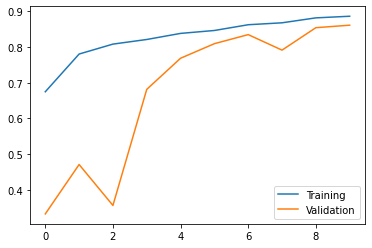

In [32]:
# visualize the accuracy improvement

accs = history.history["accuracy"]
val_accs = history.history["val_accuracy"]

plt.plot(range(len(accs)), accs, label = "Training")
plt.plot(range(len(accs)), val_accs, label = "Validation")
plt.legend()
plt.show()

In [34]:
# prediction results

model = tf.keras.models.load_model("models/model_ 0.861.h5")
preds = model.predict(x_test/255.)

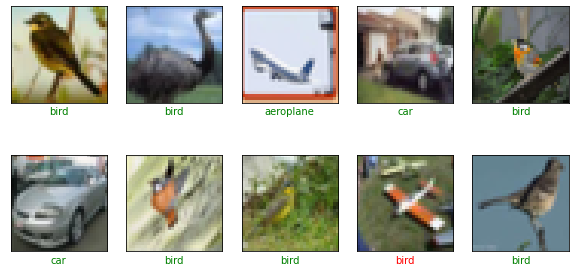

In [40]:
show_random_examples(x_test, y_test, preds)